In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
import net

Using TensorFlow backend.


In [3]:
# Create sample regression dataset

from sklearn.datasets import make_regression
n_samples = 1000
n_outliers = 50


X, y, coef = make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [4]:
# Define network and use 75% of the data for training and 25% for testing. Normalize it.

unnet = net.net(X[:750], y[:750], n_epochs=2000, n_hidden=[24,12], normalize=True)

In [5]:
# Test on ~25% of the data.
rmse, Yt_hat, MC_pred, predictive_variance = unnet.predict(X[751:], y[751:])

249/249 [==============================] - 0s 123us/step
Standard rmse 15.773337
MC rmse 16.540100
test_ll -4.714911


In [6]:
# Shape of the predictions done with MC Dropout (Dropout during Testing)
Yt_hat.shape

(1000, 1, 249, 1)

In [7]:
pred = np.zeros((249, 1000)) # empty array to be populated
means = [] # asve mean for each predicted point
std=[] # save standard dev for each predicted
for j in range(249):
    for i in range(1000):
        pred[j][i] = Yt_hat[i][0][j] # convert the predictions into a more readable format
    means.append(pred[j].mean()) # get the mean for each prediction
    std.append(pred[j].std()) # get the standard deviation

<IPython.core.display.Javascript object>


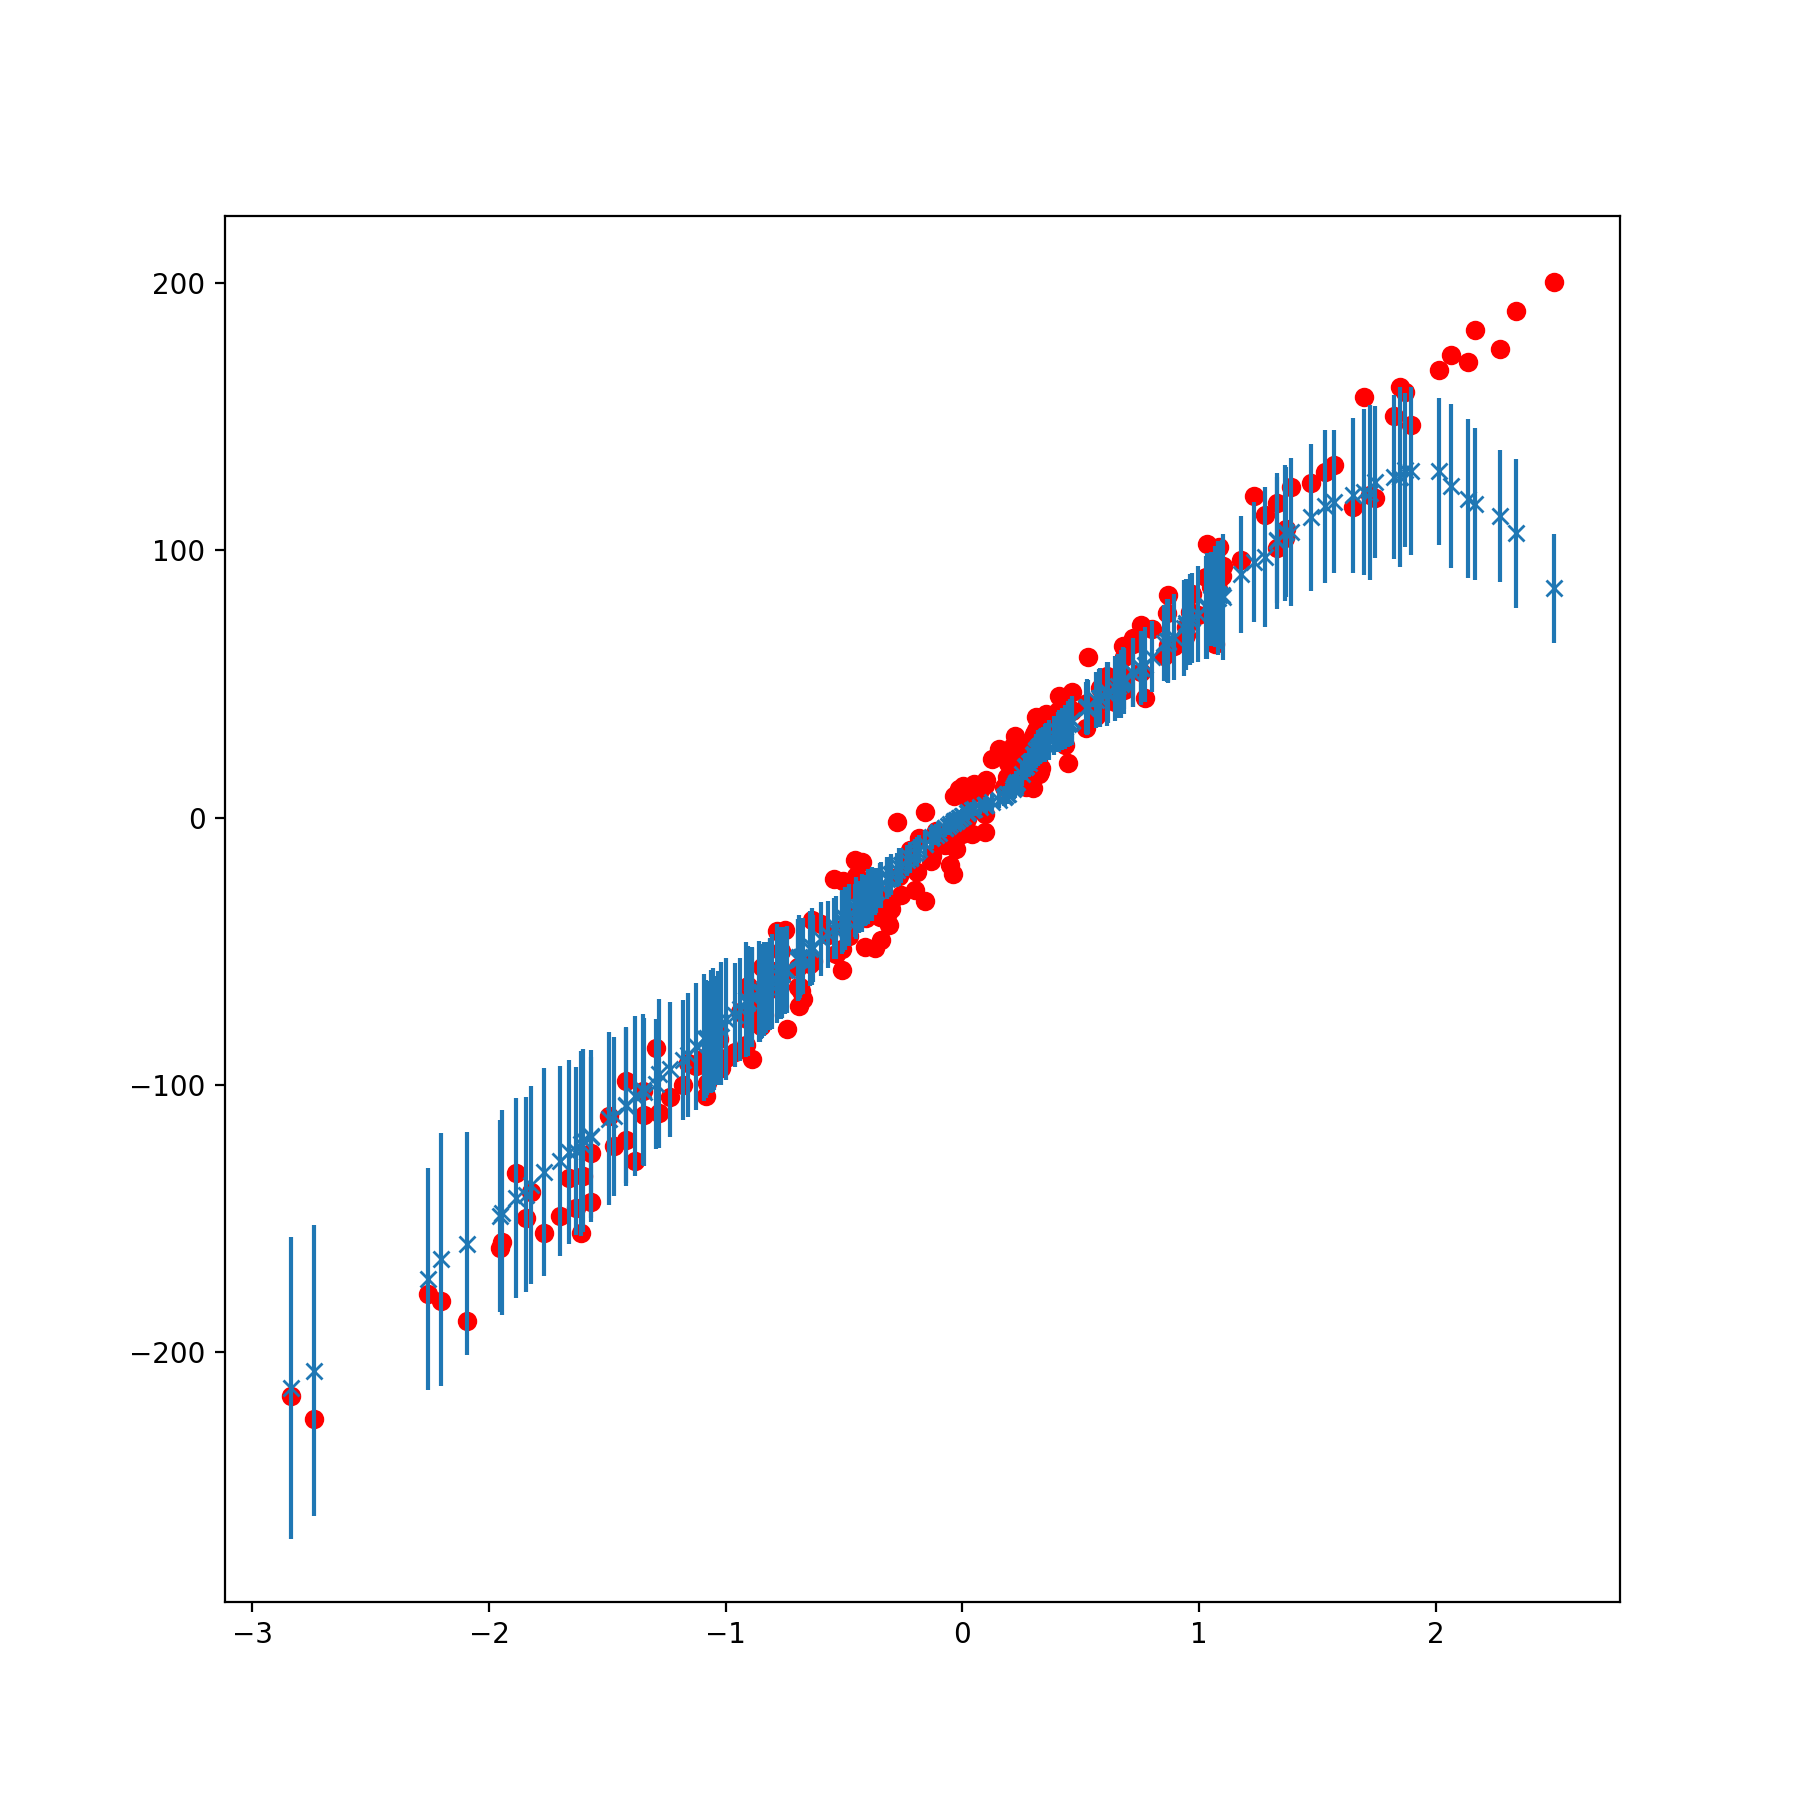

<Container object of 3 artists>

In [8]:
plt.figure(figsize=(9,9)) # make the size of the plot a bit bigger

#plot the standard deviations of each predicted mean (1 standard eviation)

plt.errorbar(x=X[751:], 
             y=means, 
             yerr=std,
             fmt='x')

In [9]:
plt.scatter(X[751:], y[751:], c='r') # add the real values on top with red color